# Дипломная работа по курсу "Python для анализа данных"

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:
1. satisfaction_level​ - Уровень удовлетворенности работой
2. Last_evaluation ​- Время с момента последней оценки в годах
3. number_projects​ - Количество проектов, выполненных за время работы
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5. time_spend_company​ - Стаж работы в компании в годах
6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left​ - уволился ли сотрудник
8. promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9. department ​- отдел в котором работает сотрудник
10. salary​ - относительный уровень зарплатыТребуется выполнить следующее задание:

### Задание 1.
#### Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Задание 2.
#### Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

Расчёт базовых статистик имеет смысл только для количественных показателей: 
- satisfaction_level, 
- last_evaluation, 
- number_project, 
- average_montly_hours, 
- time_spend_company:

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
print('Значения мод:')
print('satisfaction_level:', df['satisfaction_level'].mode()[0])
print('last_evaluation:', df['last_evaluation'].mode()[0])
print('number_project:', df['number_project'].mode()[0])
print('average_montly_hours:', df['average_montly_hours'].mode()[0])
print('time_spend_company:', df['time_spend_company'].mode()[0])

Значения мод:
satisfaction_level: 0.1
last_evaluation: 0.55
number_project: 4
average_montly_hours: 135
time_spend_company: 3


### Задание 3.
#### Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [5]:
df_only_quantitative = df.drop(['Work_accident', 'left', 'promotion_last_5years'], axis = 1)
df_only_quantitative.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:>

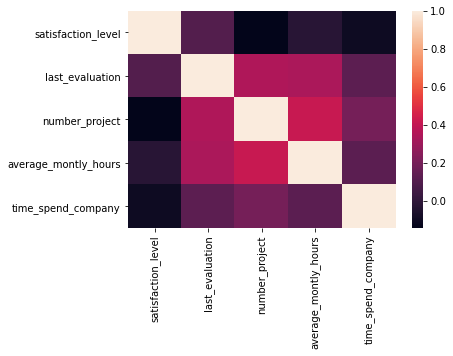

In [6]:
import seaborn as sns
sns.heatmap(df_only_quantitative.corr())

Cамые скоррелированные показатели:
1. Количество проектов и среднее количество рабочих часов в месяц
2. Количество проектов и время с последней оценки

Наименее скоррелированные показатели:
1. Среднее количество рабочих часов в месяц и уровень удовлетворённости работой
2. Стаж работы в компании и уровень удовлетворённости работой

### Задание 4.
#### Рассчитайте сколько сотрудников работает в каждом департаменте.

In [7]:
df_number_of_employees = (df[df['left'] == 0].
                          groupby('department').count().
                          drop(['satisfaction_level', 'last_evaluation',
                                'number_project', 'average_montly_hours',
                                'average_montly_hours', 'time_spend_company',
                                'Work_accident', 'left', 'promotion_last_5years'], axis = 1).
                          sort_values(by = 'salary', ascending = False).reset_index(level='department'))

df_number_of_employees.columns = ['department', 'Number of employees']

df_number_of_employees

,department,Number of employees
0,sales,3126
1,technical,2023
2,support,1674
3,IT,954
4,product_mng,704
5,RandD,666
6,marketing,655
7,accounting,563
8,management,539
9,hr,524


### Задание 5.
#### Показать распределение сотрудников по зарплатам.

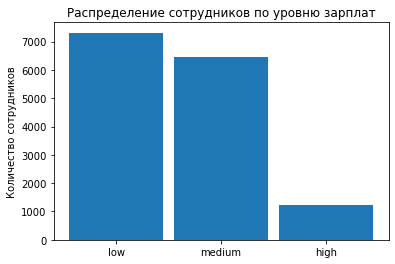

In [8]:
df_by_salary = (df.groupby('salary').
                count()[['satisfaction_level']].
                reset_index().
                rename(columns={'satisfaction_level': 'Number of employees'}).
                sort_values(by = 'Number of employees', ascending = False))

import matplotlib.pyplot as plt

plt.bar(df_by_salary['salary'], df_by_salary['Number of employees'], width = 0.9)
plt.title('Распределение сотрудников по уровню зарплат')
plt.ylabel('Количество сотрудников')

plt.show()

### Задание 6.
#### Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

Создадим функцию, которая строит распределение по уровню зарплат в заданном отделе:

In [9]:
def salary_distribution(department):
    
    df_by_salary = (df[df['department'] == department].
                    groupby('salary').
                    count()[['satisfaction_level']].
                    reset_index().
                    rename(columns={'satisfaction_level': 'Number of employees'}).
                    sort_values(by = 'Number of employees', ascending = False))

    plt.bar(df_by_salary['salary'], df_by_salary['Number of employees'], width = 0.9)
    plt.title('Распределение сотрудников по уровню зарплат в отделе: '+str(department))
    plt.ylabel('Количество сотрудников')

    plt.show()

И теперь используем её в цикле для каждого отдела:

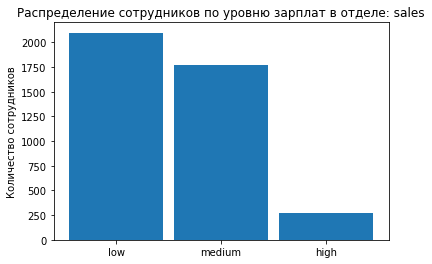

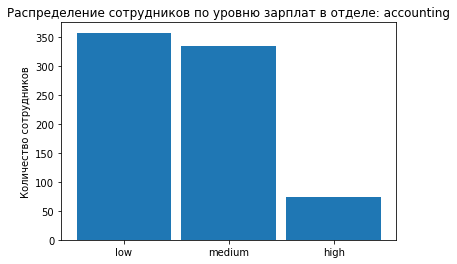

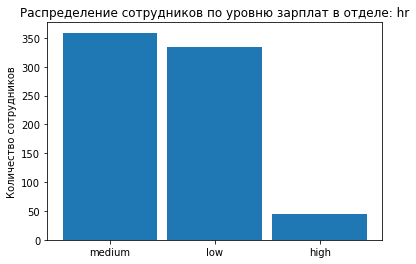

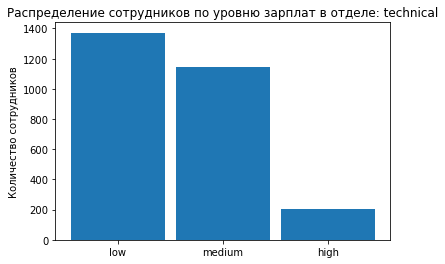

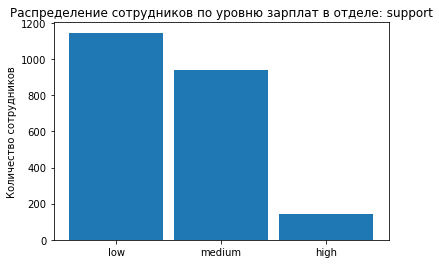

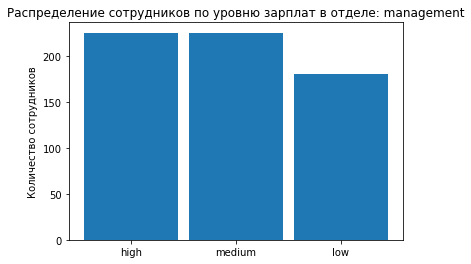

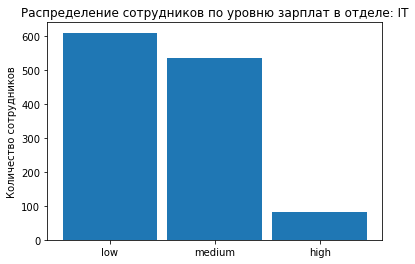

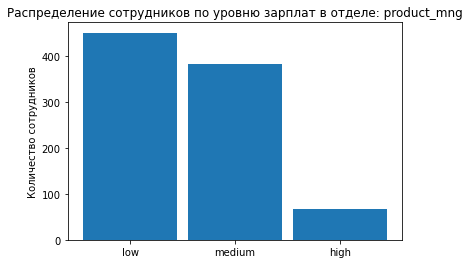

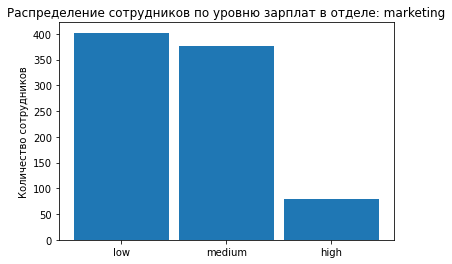

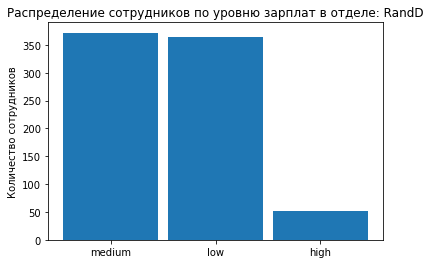

In [10]:
for department in list(df['department'].unique()):
    salary_distribution(department)

### Задание 7.
#### Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

H0: среднее количество рабочих часов в месяц у сотрудников с высоким окладом не отличается от сотрудников с низким окладом

H1: среднее количество рабочих часов в месяц у сотрудников с высоким окладом отличается от сотрудников с низким окладом

In [11]:
from scipy import stats as st

alpha = 0.05

result = st.ttest_ind(df[df['salary'] == 'high'].average_montly_hours,
                      df[df['salary'] == 'low'].average_montly_hours,
                      equal_var=False)

print(result)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, среднее количество рабочих часов в месяц у сотрудников с высоким окладом отличается от сотрудников с низким окладом')
    
else:
    print('Не отвергаем нулевую гипотезу, то есть среднее количество рабочих часов в месяц у сотрудников с высоким окладом не отличается от сотрудников с низким окладом')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу, то есть среднее количество рабочих часов в месяц у сотрудников с высоким окладом не отличается от сотрудников с низким окладом


Полученный вывод можно подтвердить визуально:

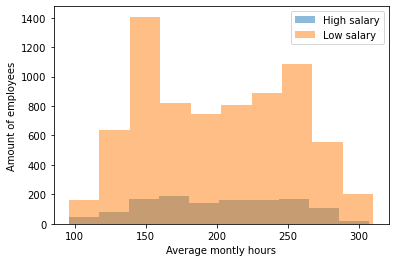

In [12]:
plt.hist(df[df['salary'] == 'high'].average_montly_hours, bins = 10, alpha=0.5, label='High salary')
plt.hist(df[df['salary'] == 'low'].average_montly_hours, bins = 10, alpha=0.5, label='Low salary')
plt.ylabel('Amount of employees')
plt.xlabel('Average montly hours')
plt.legend(loc='upper right')
plt.show()

### Задание 8.
#### Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [13]:
employees_with_promotion_left = len(df[(df['left'] == 1) & (df['promotion_last_5years'] == 1)]) / len(df[(df['left'] == 1)])
employees_with_promotion_stayed = len(df[(df['left'] == 0) & (df['promotion_last_5years'] == 1)]) / len(df[(df['left'] == 0)])
print(f'Доля сотрудников с повышением за последние 5 лет среди уволившихся: {employees_with_promotion_left:.2%}')
print(f'Доля сотрудников с повышением за последние 5 лет среди оставшихся: {employees_with_promotion_stayed:.2%}')

Доля сотрудников с повышением за последние 5 лет среди уволившихся: 0.53%
Доля сотрудников с повышением за последние 5 лет среди оставшихся: 2.63%


Средняя степень удовлетворенности среди уволившихся и неуволившихся сотрудников:

In [14]:
df.groupby('left').mean()[['satisfaction_level']]

,satisfaction_level
left,
0,0.666810
1,0.440098


Среднее количество проектов среди уволившихся и неуволившихся сотрудников:

In [15]:
df.groupby('left').mean()[['number_project']]

,number_project
left,
0,3.786664
1,3.855503


### Задание 9.
#### Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [16]:
data = df.drop(['department', 'salary'], axis = 1)

data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['left'], axis = 1), 
                                                    data['left'],
                                                    test_size = 0.3)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, lda.predict(X_test))

0.7695555555555555